In [1]:
# Set up
import sklearn
import tkinter
import tkinter.messagebox
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
import random 


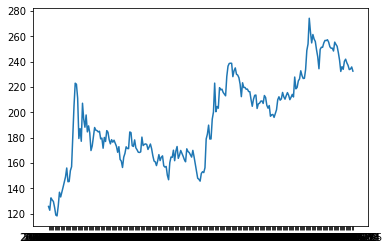

<ipython-input-14-f68682c00b19>:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Days'] = days_arr
<ipython-input-14-f68682c00b19>:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df[column][i] = (temp_df[column][i] - temp_min)/(temp_max - temp_min)
<ipython-input-14-f68682c00b19>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B1 = tkinter.Button(self.frame, te

           Open  Days
0    125.800003     0
1    122.809998     1
2    132.570007     2
3    130.919998     3
4    129.720001     4
..          ...   ...
247  237.000000   247
248  233.679993   248
249  234.110001   249
250  235.750000   250
251  232.449997   251

[252 rows x 2 columns]
0
100
200
300
400
500
600
700
800
900
232.45029480101272
[0.5460698893512514, 0.0002978010127169133]
best epoch: 59


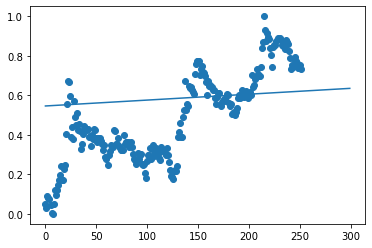

In [ ]:
class StockReportingApp():
    
    def __init__(self):
        self.tk = tkinter.Tk()
        self.tk.geometry("600x250")
        self.stock_file_name = None
        self.frame = tkinter.Frame(self.tk)
        self.frame.pack()
        
    def clear_frame(self):
        for widgets in self.frame.winfo_children():
            widgets.forget()
            
            
    def create_first_menu(self):
        
        self.tk.title("Stock Project")

        L1= tkinter.Label(self.frame,text = "Stock Name")
        L1.pack(side = "top")

        E1 = tkinter.Entry(self.frame, bd = 5)
        E1.pack(side="top")

        B1 = tkinter.Button(self.frame, text = "Submit and Generate Model",
                            command = lambda: self.create_second_menu(E1.get()))
        B1.pack(side = "top")

        self.tk.mainloop()
        
    def create_second_menu(self,stock_name):
        self.clear_frame()
        self.stock_file_name = stock_name + ".csv"
        
        try:
            df = pd.read_csv(self.stock_file_name)
        except:
            tkinter.messagebox.showinfo("Error","File Name Does Not Exist!")
            
        B1 = tkinter.Button(self.frame, text = "See Graph Of Price",command = lambda: self.show_historical_graph(df))
        B1.pack(side = "top")
        
        B2 = tkinter.Button(self.frame, text = "Predict Future Price", command = lambda : self.create_third_menu(df))
        B2.pack(side = "top")
        
        B3 = tkinter.Button(self.frame, text = "Try Another Stock", command = lambda : self.create_first_menu())
        B3.pack(side="top")
        
    def create_third_menu(self,df):
        self.clear_frame()
        L1 = tkinter.Label(self.frame,text = "How Many Days Into The Future Would You Like To Predict?")
        L1.pack(side = "top")
        E1 = tkinter.Entry(self.frame, bd = 5)
        E1.pack(side = "top")
        
        B1 = tkinter.Button(self.frame, text = "Predict Price!",command = lambda : self.predict_price(df,int(E1.get())))
        B1.pack()
    
    def predict_price(self,df,days):
        #set alpha value to semi-large value
        alpha = 0.00001
        
        #set epoch value
        
        epochs = 1000
    
        
        theta_vector = [] #Theta0 is our "y intercept" or bias
        
        #want to predict opening price, don't need the date
        temp_df = df[['Open']]
        
        
        # +1 is used for theta_0
        size = len(temp_df.columns)+1
       
        
        m = len(temp_df)
        days_arr = []
        for i in range(m):
            days_arr.append(i)
        temp_df['Days'] = days_arr
        
        #set up theta vector with random values
        for i in range(size):
            theta_vector.append(random.random())
        
        print(temp_df)
        
        #normalize data
        
        
        column = "Open"
        temp_max = max(temp_df[column])
        temp_min = min(temp_df[column])
        avg = sum(temp_df[column]) / len(temp_df[column])
            
        for i in range(len(temp_df[column])):
            temp_df[column][i] = (temp_df[column][i] - temp_min)/(temp_max - temp_min)
        
        
        
        
        
            
        #begin theta updating 
        
        for e in range(epochs):
            
            t_0_deriv = 0
            t_1_deriv = 0
            for i in range(m):
                t_0_deriv += (theta_vector[1]*temp_df["Days"][i] + theta_vector[0] ) -  temp_df["Open"][i]
                t_1_deriv +=((theta_vector[1]*temp_df["Days"][i] + theta_vector[0]) - temp_df["Open"][i]) *temp_df["Days"][i]
            
            
            if(t_0_deriv >= 0 and t_1_deriv >=0):
                temp_avg = t_0_deriv + t_1_deriv
                temp_avg = temp_avg / 2
                
                if(temp_avg < avg):
                    best_epoch_value = e
                    avg = temp_avg
            
            
            theta_vector[0] -= ((1/m) * alpha * t_0_deriv)
            theta_vector[1] -= ((1/m) * alpha * t_1_deriv)
            if e %100 == 0 :
                print(e)
                
        sum_val = 0
        for i in range(1,len(theta_vector)):
            sum_val += theta_vector[i]*days
        
        
        
        curr_price = df["Open"][len(df["Open"])-1]
        new_price = sum_val + curr_price
        print(new_price)
        print(theta_vector)
        print("best epoch:", best_epoch_value)
        #Plot line among data values
        
        
        temp_x = []
        temp_y = []
        for i in range(300):
            temp_x.append(i)
            temp_val = 0
            for j in range(1,len(theta_vector)):
                temp_val+= theta_vector[j]*i
            temp_val+=theta_vector[0]
            temp_y.append(temp_val)
        plt.plot(temp_x,temp_y)
        plt.scatter(temp_df["Days"],temp_df["Open"])
        plt.show()
            
            
    
        
    def show_historical_graph(self,df):
        if ("Open" not in df.columns) and ("open" not in df.columns):
            tkinter.messagebox.showinfo("Error","Dataframe does not contain opening stock price column!")
        else:
            plt.plot(df["Date"],df["Open"])
            plt.show()

SRA = StockReportingApp()
SRA.create_first_menu()